In [1]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import statsmodels.formula.api as s
import statsmodels.api as sm
from statsmodels.formula.api import ols


c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
final = pickle.load(open( '../00_data/final/incorrect_answers.pkl','rb') )

In [3]:
intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]

Check assumptions

In [4]:
# Levenes homogeneity => homogeneity = not significant // significant = no homogeneity 
stats.levene(intvcontrol['prop_fehler'], intv2['prop_fehler'], intv3['prop_fehler'], intv4['prop_fehler'], intv5['prop_fehler'], intv6['prop_fehler'])

LeveneResult(statistic=17.10181111328221, pvalue=6.808097532502985e-17)

In [5]:
# Shapiro-Wilk test for normality => normality = not significant // significant = no normality 
print(stats.shapiro(intvcontrol['prop_fehler']))
print(stats.shapiro(intv2['prop_fehler']))
print(stats.shapiro(intv3['prop_fehler']))
print(stats.shapiro(intv4['prop_fehler']))
print(stats.shapiro(intv5['prop_fehler']))
print(stats.shapiro(intv6['prop_fehler']))

ShapiroResult(statistic=0.7264866232872009, pvalue=0.0)
ShapiroResult(statistic=0.5711383819580078, pvalue=0.0)
ShapiroResult(statistic=0.7002403736114502, pvalue=0.0)
ShapiroResult(statistic=0.742385745048523, pvalue=0.0)
ShapiroResult(statistic=0.7237004041671753, pvalue=0.0)
ShapiroResult(statistic=0.7595332860946655, pvalue=1.1210387714598537e-44)


<AxesSubplot:xlabel='prop_fehler', ylabel='Count'>

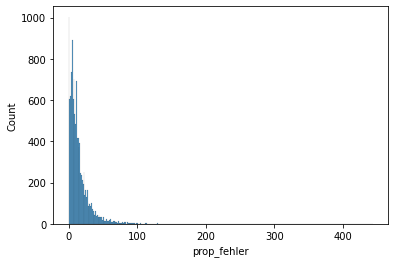

In [6]:
sns.histplot(data=final, x="prop_fehler")

In [7]:
# # Fit and summarize ols model
# model = ols('prop_fehler ~ C(interventiongroup)+C(Geschlecht)+C(interventiongroup):C(Geschlecht)',data=final).fit()
# # type-1 anova summary 
# table_type_1 = sm.stats.anova_lm(model, typ=1)

# # type-2 anova summary
# table_type_2 = sm.stats.anova_lm(model, typ=2)
# table_type_1

In [8]:
# aov = pg.anova(data=final, dv='prop_fehler', between=['interventiongroup'], detailed=True)
# print(aov)


Übersicht Effektgroeßen

In [9]:
prop_fehler_by_group = final.groupby(['interventiongroup']).agg({'prop_fehler':'median','Geschlecht':'count'})
prop_fehler_by_group = prop_fehler_by_group.rename(columns={'Geschlecht':'count'})
prop_fehler_by_group

,prop_fehler,count
interventiongroup,,
2,10.00,1835
3,10.00,1929
4,10.50,1910
5,9.00,1818
6,7.95,1733
control,12.00,2447


In [10]:
prop_fehler_by_group = final.groupby(['Geschlecht','interventiongroup']).agg({'prop_fehler':'median','Klassenstufe':'count'})
prop_fehler_by_group = prop_fehler_by_group.rename(columns={'Klassenstufe':'count'})

prop_fehler_by_group

prop_fehler  count
Geschlecht interventiongroup                    
d          2                    10.000000     50
           3                     8.000000     66
           4                    12.000000     57
           5                     6.800000     68
           6                     7.000000     73
           control              11.727273     79
m          2                    10.000000    864
           3                    10.000000    883
           4                    11.000000    935
           5                    10.000000    874
           6                     8.000000    830
           control              12.250000   1165
w          2                    10.000000    921
           3                    10.000000    980
           4                     9.598214    918
           5                     8.654762    876
           6                     7.679487    830
           control              12.000000   1203

In [11]:
prop_fehler_by_group = final.groupby(['Klassenstufe','interventiongroup']).agg({'prop_fehler':'median','Geschlecht':'count'})
prop_fehler_by_group = prop_fehler_by_group.rename(columns={'Geschlecht':'count'})

prop_fehler_by_group

prop_fehler  count
Klassenstufe interventiongroup                    
10           2                     9.333333    176
             3                     9.000000    187
             4                    10.000000    175
             5                     9.000000    167
             6                     7.750000    167
             control              10.708333    212
11           2                     8.000000    169
             3                    10.000000    176
             4                     9.000000    165
             5                     8.000000    151
             6                     8.000000    147
             control              12.000000    207
12           2                     7.833333     55
             3                     6.000000     49
             4                     7.600000     41
             5                     8.250000     54
             6                     6.000000     44
             control               9.000000     59
13           2                     9.437500     31
             3                    11.833333     24
             4                     8.000000     31
             5                     7.000000     26
             6                     7.321429     32
             control              11.333333     43
5            2                    10.142857    194
             3                    12.750000    186
             4                    12.000000    206
             5                     9.000000    167
             6                     8.000000    182
             control              13.416667    254
6            2                    11.607143    282
             3                    10.000000    289
             4                    10.500000    305
             5                    10.000000    278
             6                     8.000000    258
             control              12.800000    353
7            2                    11.000000    259
             3                    11.000000    292
             4                    11.000000    344
             5                    10.250000    329
             6                     8.500000    293
             control              12.033333    442
8            2                    10.000000    345
             3                     9.615385    393
             4                    11.333333    347
             5                     9.000000    323
             6                     7.916667    324
             control              11.250000    462
9            2                     9.472222    324
             3                    10.000000    333
             4                    10.000000    296
             5                     9.333333    323
             6                     7.000000    286
             control              12.000000    415

Alle Daten

In [12]:
# Kruskal Wallis Test 
stats.kruskal(intvcontrol['prop_fehler'], intv2['prop_fehler'], intv3['prop_fehler'],intv4['prop_fehler'],intv5['prop_fehler'],intv6['prop_fehler'])


KruskalResult(statistic=187.5916770688063, pvalue=1.278058309793044e-38)

In [13]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv2['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv3['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv4['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv5['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv6['prop_fehler']))


MannwhitneyuResult(statistic=2522807.0, pvalue=3.996059053380393e-12)
MannwhitneyuResult(statistic=2642869.5, pvalue=9.426761013919426e-12)
MannwhitneyuResult(statistic=2565388.0, pvalue=2.90512710702606e-08)
MannwhitneyuResult(statistic=2514632.0, pvalue=2.8526073483274315e-13)
MannwhitneyuResult(statistic=2643115.0, pvalue=3.85541934504446e-42)


<AxesSubplot:xlabel='prop_fehler', ylabel='interventiongroup'>

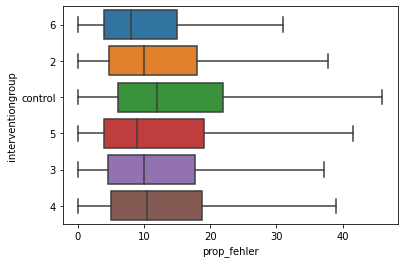

In [14]:
sns.boxplot(data=final, x="prop_fehler", y="interventiongroup",showfliers = False)#,hue='Geschlecht'


<AxesSubplot:xlabel='prop_fehler', ylabel='Geschlecht'>

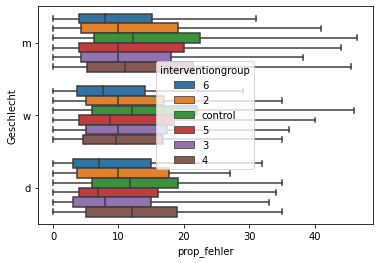

In [15]:
sns.boxplot(data=final, x="prop_fehler", hue="interventiongroup",y='Geschlecht',showfliers = False)


Gender Demographics

In [16]:
final_m = final.loc[final.Geschlecht == 'm']
final_w = final.loc[final.Geschlecht == 'w']
final_d = final.loc[final.Geschlecht == 'd']

Jungen

In [17]:
intvcontrol_m = final_m[(final_m['interventiongroup']=='control')]
intv2_m = final_m[(final_m['interventiongroup']=='2')]
intv3_m = final_m[(final_m['interventiongroup']=='3')]
intv4_m = final_m[(final_m['interventiongroup']=='4')]
intv5_m = final_m[(final_m['interventiongroup']=='5')]
intv6_m = final_m[(final_m['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_m['prop_fehler'], intv2_m['prop_fehler'], intv3_m['prop_fehler'],intv4_m['prop_fehler'],intv5_m['prop_fehler'],intv6_m['prop_fehler'])



KruskalResult(statistic=88.8980806718587, pvalue=1.1448700947751413e-17)

In [18]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_m['prop_fehler'], intv2_m['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_m['prop_fehler'], intv3_m['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_m['prop_fehler'], intv4_m['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_m['prop_fehler'], intv5_m['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_m['prop_fehler'], intv6_m['prop_fehler']))


MannwhitneyuResult(statistic=567961.5, pvalue=7.138959799153062e-07)
MannwhitneyuResult(statistic=582520.0, pvalue=2.6811687910437267e-07)
MannwhitneyuResult(statistic=585011.5, pvalue=0.0034566278337886933)
MannwhitneyuResult(statistic=570249.5, pvalue=3.349344269639201e-06)
MannwhitneyuResult(statistic=600697.5, pvalue=2.3613000342151007e-20)


<AxesSubplot:xlabel='prop_fehler', ylabel='interventiongroup'>

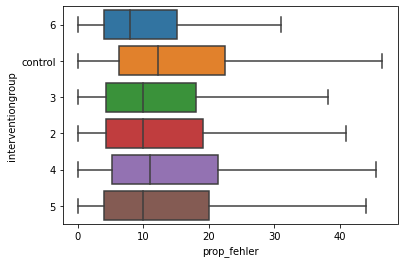

In [19]:
sns.boxplot(data=final_m, x="prop_fehler", y="interventiongroup",showfliers = False)


Maedchen

In [20]:
intvcontrol_w = final_w[(final_w['interventiongroup']=='control')]
intv2_w = final_w[(final_w['interventiongroup']=='2')]
intv3_w = final_w[(final_w['interventiongroup']=='3')]
intv4_w = final_w[(final_w['interventiongroup']=='4')]
intv5_w = final_w[(final_w['interventiongroup']=='5')]
intv6_w = final_w[(final_w['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_w['prop_fehler'], intv2_w['prop_fehler'], intv3_w['prop_fehler'],intv4_w['prop_fehler'],intv5_w['prop_fehler'],intv6_w['prop_fehler'])


KruskalResult(statistic=97.91293918250327, pvalue=1.4547609801609048e-19)

In [21]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_w['prop_fehler'], intv2_w['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_w['prop_fehler'], intv3_w['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_w['prop_fehler'], intv4_w['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_w['prop_fehler'], intv5_w['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_w['prop_fehler'], intv6_w['prop_fehler']))


MannwhitneyuResult(statistic=619535.5, pvalue=2.860894795184369e-06)
MannwhitneyuResult(statistic=649666.0, pvalue=3.957281635059926e-05)
MannwhitneyuResult(statistic=623058.0, pvalue=3.919004386692723e-07)
MannwhitneyuResult(statistic=599913.5, pvalue=6.590231295567846e-08)
MannwhitneyuResult(statistic=625222.5, pvalue=3.4921421403431483e-22)


<AxesSubplot:xlabel='prop_fehler', ylabel='interventiongroup'>

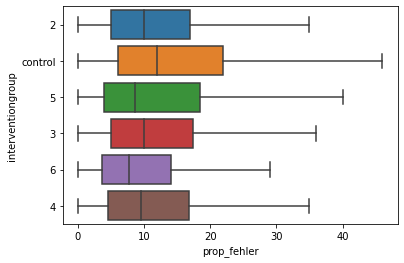

In [22]:
sns.boxplot(data=final_w, x="prop_fehler", y="interventiongroup",showfliers = False)

Divers

In [23]:
intvcontrol_d = final_d[(final_d['interventiongroup']=='control')]
intv2_d = final_d[(final_d['interventiongroup']=='2')]
intv3_d = final_d[(final_d['interventiongroup']=='3')]
intv4_d = final_d[(final_d['interventiongroup']=='4')]
intv5_d = final_d[(final_d['interventiongroup']=='5')]
intv6_d = final_d[(final_d['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_d['prop_fehler'], intv2_d['prop_fehler'], intv3_d['prop_fehler'],intv4_d['prop_fehler'],intv5_d['prop_fehler'],intv6_d['prop_fehler'])


KruskalResult(statistic=9.23797399116189, pvalue=0.09994043289814702)

In [24]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_d['prop_fehler'], intv2_d['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_d['prop_fehler'], intv3_d['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_d['prop_fehler'], intv4_d['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_d['prop_fehler'], intv5_d['prop_fehler']))
print(stats.mannwhitneyu(intvcontrol_d['prop_fehler'], intv6_d['prop_fehler']))


MannwhitneyuResult(statistic=2202.0, pvalue=0.27337245532079024)
MannwhitneyuResult(statistic=3108.0, pvalue=0.04678450190809122)
MannwhitneyuResult(statistic=2268.5, pvalue=0.9419655022792591)
MannwhitneyuResult(statistic=3135.5, pvalue=0.08091551304430175)
MannwhitneyuResult(statistic=3520.0, pvalue=0.018955292198109645)


[Text(0.5, 0, 'Incorrect answers'), Text(0, 0.5, 'Intervention group')]

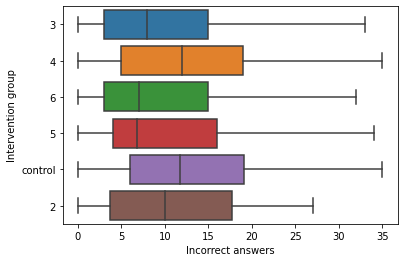

In [26]:
gr = sns.boxplot(data=final_d, x="prop_fehler", y="interventiongroup",showfliers = False)
gr.set(xlabel ="Incorrect answers", ylabel = "Intervention group")


Demographics Klassenstufe

In [ ]:
final_5 = final.loc[final.Klassenstufe == '5']
final_6 = final.loc[final.Klassenstufe == '6']
final_7 = final.loc[final.Klassenstufe == '7']
final_8 = final.loc[final.Klassenstufe == '8']
final_9 = final.loc[final.Klassenstufe == '9']
final_10 = final.loc[final.Klassenstufe == '10']
final_11 = final.loc[final.Klassenstufe == '11']
final_12 = final.loc[final.Klassenstufe == '12']
final_13 = final.loc[final.Klassenstufe == '13']

klassenliste = [final_5, final_6, final_7, final_8, final_9, final_10, final_11, final_12, final_13]

for x in klassenliste:
    intvcontrol = x[(x['interventiongroup']=='control')]
    intv2 = x[(x['interventiongroup']=='2')]
    intv3 = x[(x['interventiongroup']=='3')]
    intv4 = x[(x['interventiongroup']=='4')]
    intv5 = x[(x['interventiongroup']=='5')]
    intv6 = x[(x['interventiongroup']=='6')]

    # Kruskal Wallis Test 
    print(stats.kruskal(intvcontrol['prop_fehler'], intv2['prop_fehler'], intv3['prop_fehler'],intv4['prop_fehler'],intv5['prop_fehler'],intv6['prop_fehler']))


KruskalResult(statistic=26.127963665169766, pvalue=8.427837475942187e-05)
KruskalResult(statistic=23.47320522882372, pvalue=0.000274019809230039)
KruskalResult(statistic=25.66662982035462, pvalue=0.0001035493201221223)
KruskalResult(statistic=34.41197796481034, pvalue=1.971069615549076e-06)
KruskalResult(statistic=53.29660894383976, pvalue=2.923247214428506e-10)
KruskalResult(statistic=20.775392558934005, pvalue=0.0008931417002862665)
KruskalResult(statistic=22.673153497336557, pvalue=0.0003897501992315538)
KruskalResult(statistic=6.966921996029361, pvalue=0.2231120086768867)
KruskalResult(statistic=7.9781298510754945, pvalue=0.15744506029104643)


In [ ]:
klassenliste = [final_5, final_6, final_7, final_8]

for x in klassenliste:
    intvcontrol = x[(x['interventiongroup']=='control')]
    intv2 = x[(x['interventiongroup']=='2')]
    intv3 = x[(x['interventiongroup']=='3')]
    intv4 = x[(x['interventiongroup']=='4')]
    intv5 = x[(x['interventiongroup']=='5')]
    intv6 = x[(x['interventiongroup']=='6')]

    #Wilcoxon Mann Whitney Test
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv2['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv3['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv4['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv5['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv6['prop_fehler']))
    print('--------------')




MannwhitneyuResult(statistic=27637.0, pvalue=0.027196665806396018)
MannwhitneyuResult(statistic=26045.5, pvalue=0.06587703022887151)
MannwhitneyuResult(statistic=27995.5, pvalue=0.1959864455676419)
MannwhitneyuResult(statistic=25261.0, pvalue=0.0009068161944731832)
MannwhitneyuResult(statistic=29430.5, pvalue=1.1229897410925748e-06)
--------------
MannwhitneyuResult(statistic=53352.5, pvalue=0.11914249074976836)
MannwhitneyuResult(statistic=57045.5, pvalue=0.009811071340580454)
MannwhitneyuResult(statistic=60888.0, pvalue=0.0037080196623966444)
MannwhitneyuResult(statistic=54893.5, pvalue=0.01037171332420872)
MannwhitneyuResult(statistic=55544.5, pvalue=3.415080934607445e-06)
--------------
MannwhitneyuResult(statistic=64233.5, pvalue=0.0068710949285664714)
MannwhitneyuResult(statistic=71602.5, pvalue=0.011903992173256179)
MannwhitneyuResult(statistic=85323.0, pvalue=0.003229059534463344)
MannwhitneyuResult(statistic=81277.0, pvalue=0.0050859915126414855)
MannwhitneyuResult(statistic=7

In [ ]:
klassenliste = [final_9, final_10, final_11]

for x in klassenliste:
    intvcontrol = x[(x['interventiongroup']=='control')]
    intv2 = x[(x['interventiongroup']=='2')]
    intv3 = x[(x['interventiongroup']=='3')]
    intv4 = x[(x['interventiongroup']=='4')]
    intv5 = x[(x['interventiongroup']=='5')]
    intv6 = x[(x['interventiongroup']=='6')]

    #Wilcoxon Mann Whitney Test
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv2['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv3['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv4['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv5['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv6['prop_fehler']))
    print('--------------')




MannwhitneyuResult(statistic=77877.0, pvalue=0.00021739409505905908)
MannwhitneyuResult(statistic=77157.0, pvalue=0.006063296921733136)
MannwhitneyuResult(statistic=67461.0, pvalue=0.02523354940745512)
MannwhitneyuResult(statistic=74518.5, pvalue=0.009075112832577947)
MannwhitneyuResult(statistic=78434.0, pvalue=4.306645557304548e-13)
--------------
MannwhitneyuResult(statistic=21143.0, pvalue=0.023745478155991945)
MannwhitneyuResult(statistic=23468.5, pvalue=0.0015125449254752728)
MannwhitneyuResult(statistic=19693.0, pvalue=0.29681171595418154)
MannwhitneyuResult(statistic=19134.0, pvalue=0.1762978853318251)
MannwhitneyuResult(statistic=21980.0, pvalue=5.334557638163542e-05)
--------------
MannwhitneyuResult(statistic=21472.5, pvalue=0.00014603957180598983)
MannwhitneyuResult(statistic=20362.5, pvalue=0.04682045529720143)
MannwhitneyuResult(statistic=20305.5, pvalue=0.0017308091795221908)
MannwhitneyuResult(statistic=18725.0, pvalue=0.0013629854377331708)
MannwhitneyuResult(statistic

In [ ]:
# print(sns.boxplot(data=final_5, x="prop_fehler", y="interventiongroup",showfliers = False))

In [ ]:
# print(sns.boxplot(data=final_8, x="prop_fehler", y="interventiongroup",showfliers = False))

In [ ]:
# print(sns.boxplot(data=final_9, x="prop_fehler", y="interventiongroup",showfliers = False))